## Steps for machine learning:
1. Data Reading
2. Data Analysis
3. Data Cleaning if required
4. Data Viusalization
5. Data Preprocessing:-
   a.) Encoding
   b.) Input / Output Creation
   c.) Train Test Split
   d.) Standarization
6. Algorithmic Model Selection
7. Model Training
8. Model Accuracy
9. Future Prediction


### Data Reading and Analysis

# Continous output 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
adv =  pd.read_csv(r"D:\CTTC files\Datasets for practice\Advertising Budget and Sales.csv")
adv

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
adv.columns = ['Index','TV','Radio','Newspaper','Sales']
adv

,Index,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
adv = adv.set_index('Index')
adv


,TV,Radio,Newspaper,Sales
Index,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8


In [6]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [7]:
adv.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
for i in adv.columns:
    print(i, '\n', adv[i].unique())

TV 
 [230.1  44.5  17.2 151.5 180.8   8.7  57.5 120.2   8.6 199.8  66.1 214.7
  23.8  97.5 204.1 195.4  67.8 281.4  69.2 147.3 218.4 237.4  13.2 228.3
  62.3 262.9 142.9 240.1 248.8  70.6 292.9 112.9  97.2 265.6  95.7 290.7
 266.9  74.7  43.1 228.  202.5 177.  293.6 206.9  25.1 175.1  89.7 239.9
 227.2  66.9 100.4 216.4 182.6 262.7 198.9   7.3 136.2 210.8 210.7  53.5
 261.3 239.3 102.7 131.1  69.   31.5 139.3 216.8 199.1 109.8  26.8 129.4
 213.4  16.9  27.5 120.5   5.4 116.   76.4 239.8  75.3  68.4 213.5 193.2
  76.3 110.7  88.3 134.3  28.6 217.7 250.9 107.4 163.3 197.6 184.9 289.7
 135.2 222.4 296.4 280.2 187.9 238.2 137.9  25.   90.4  13.1 255.4 225.8
 241.7 175.7 209.6  78.2  75.1 139.2 125.7  19.4 141.3  18.8 224.  123.1
 229.5  87.2   7.8  80.2 220.3  59.6   0.7 265.2   8.4 219.8  36.9  48.3
  25.6 273.7  43.   73.4 193.7 220.5 104.6  96.2 140.3 243.2  38.   44.7
 280.7 121.  171.3 187.8   4.1  93.9 149.8  11.7 131.7 172.5  85.7 188.4
 163.5 117.2 234.5  17.9 206.8 215.4 284.3  50

In [9]:
adv.describe(include='all')

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Data Visualization

[]

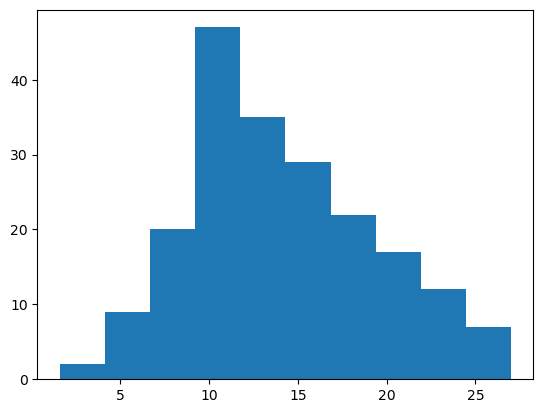

In [11]:
plt.hist(adv.Sales)
plt.plot()

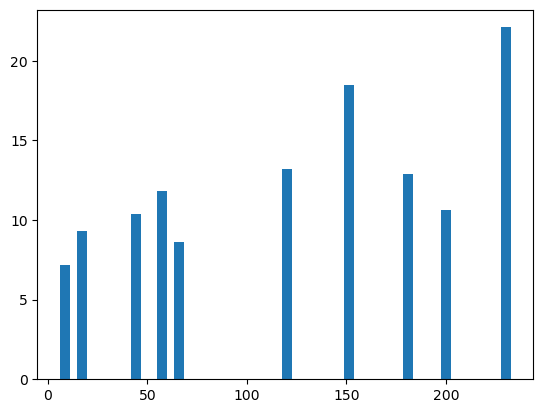

In [12]:
plt.bar(adv.TV[0:11],adv.Sales[0:11], width = 5)
plt.show()

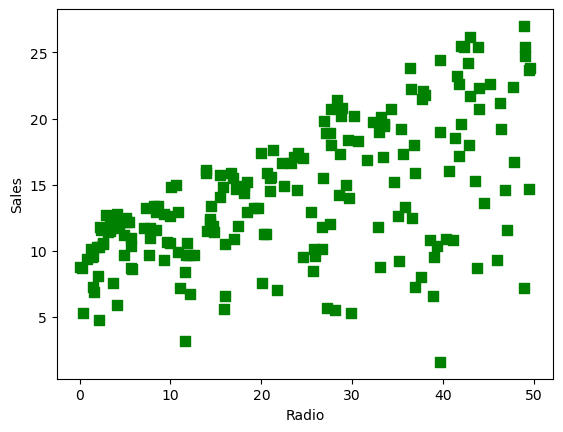

In [13]:
plt.scatter(adv.Radio,adv.Sales,s=60,marker='s',color = 'green')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show()

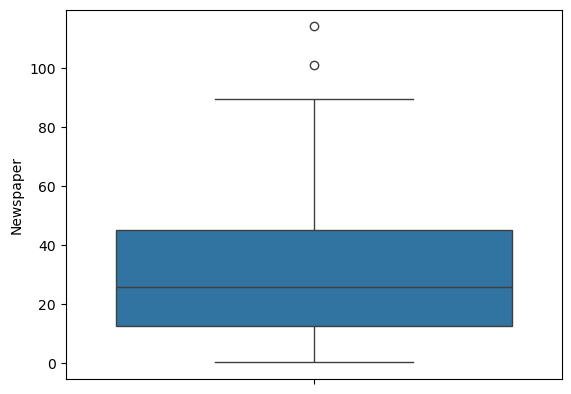

In [14]:
sns.boxplot(adv.Newspaper)
plt.show()

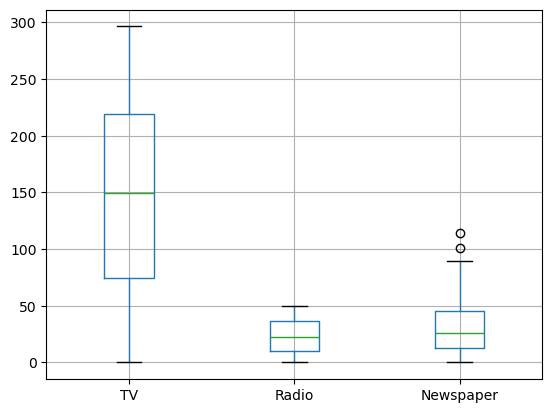

In [15]:
adv.boxplot(column=['TV', 'Radio', 'Newspaper'])
plt.show()
            

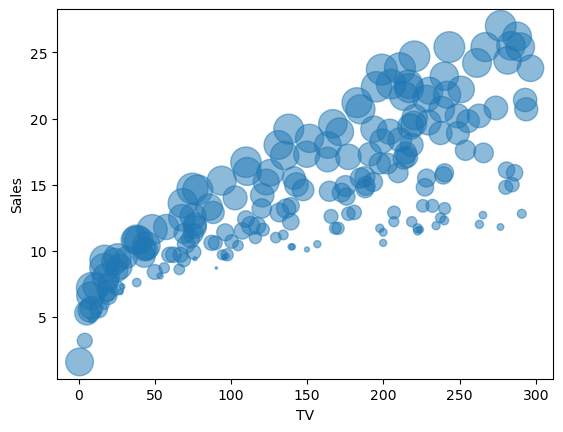

In [16]:
plt.scatter(adv.TV,adv.Sales,s=adv['Radio']*10,alpha=0.5)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

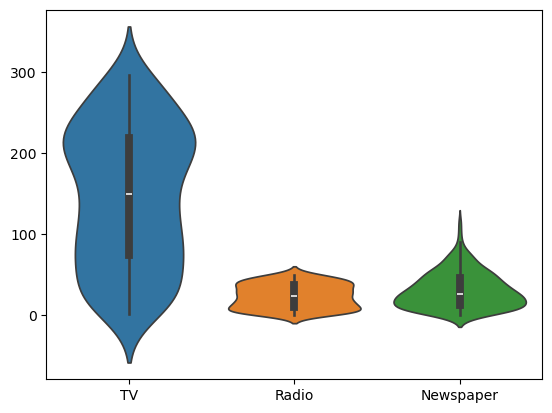

In [17]:
sns.violinplot(data = adv[['TV', 'Radio','Newspaper']])
plt.show()

In [18]:
# Pie Chart
TV = sum(adv.TV)
Radio = sum(adv.Radio)
Newspaper = sum(adv.Newspaper)
TV,Radio,Newspaper

(29408.5, 4652.8, 6110.8)

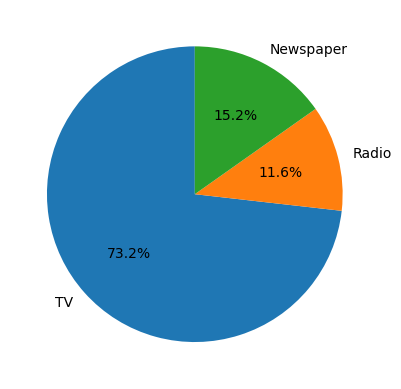

In [19]:
categories = ['TV','Radio','Newspaper']
sum = [29408.5, 4652.8, 6110.8]
plt.pie(sum,labels=categories, startangle = 90, autopct=('%1.1f%%'))
plt.show()


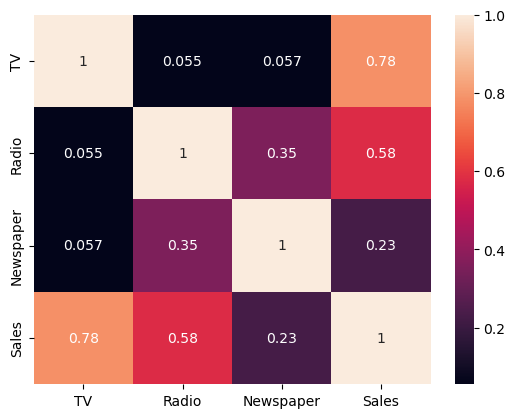

In [20]:
cor = adv.corr()
sns.heatmap(cor,annot = True)
plt.show()

#### Data Preprocessing:
1. Input / Output

In [21]:
ip = adv.drop(['Sales'],axis = 1) 
op = adv.Sales


In [22]:
ip

,TV,Radio,Newspaper
Index,,,
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4


In [23]:
op


Index
1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: Sales, Length: 200, dtype: float64

2. Train_Test_Split

In [24]:
from sklearn.model_selection import train_test_split
xtrain , xtest, ytrain, ytest = train_test_split(ip,op,train_size=0.8)

In [25]:
xtrain

,TV,Radio,Newspaper
Index,,,
136,48.3,47.0,8.5
13,23.8,35.1,65.9
57,7.3,28.1,41.4
76,16.9,43.7,89.4
146,140.3,1.9,9.0
...,...,...,...
34,265.6,20.0,0.3
53,216.4,41.7,39.6
102,296.4,36.3,100.9


In [26]:
ytrain

Index
136    11.6
13      9.2
57      5.5
76      8.7
146    10.3
       ... 
34     17.4
53     22.6
102    23.8
83     11.3
135    10.8
Name: Sales, Length: 160, dtype: float64

In [27]:
xtest.shape


(40, 3)

In [28]:
ytest.shape

(40,)

#### 3. Standarization (Data Transformation)
1. Standard Scaler
2. Min Max Scaler

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
mimx = MinMaxScaler()

In [30]:
xtrain1 = sc.fit_transform(xtrain)
xtest1 = sc.fit_transform(xtest)


In [31]:
print(xtrain1[0:5])
print(xtrain[0:5])

[[-1.13270815  1.58056671 -1.03142248]
 [-1.4175839   0.79142313  1.61839963]
 [-1.609439    0.32722103  0.48737799]
 [-1.49781422  1.36172857  2.70325711]
 [-0.06297062 -1.41022111 -1.00834041]]
          TV  Radio  Newspaper
Index                         
136     48.3   47.0        8.5
13      23.8   35.1       65.9
57       7.3   28.1       41.4
76      16.9   43.7       89.4
146    140.3    1.9        9.0


In [32]:
xtrain2 = mimx.fit_transform(xtrain)
xtest2 = mimx.fit_transform(xtest)

In [33]:
print('Standard',xtrain1[0:5])
print('Normal',xtrain[0:5])
print('mimx',xtrain2[0:5])

Standard [[-1.13270815  1.58056671 -1.03142248]
 [-1.4175839   0.79142313  1.61839963]
 [-1.609439    0.32722103  0.48737799]
 [-1.49781422  1.36172857  2.70325711]
 [-0.06297062 -1.41022111 -1.00834041]]
Normal           TV  Radio  Newspaper
Index                         
136     48.3   47.0        8.5
13      23.8   35.1       65.9
57       7.3   28.1       41.4
76      16.9   43.7       89.4
146    140.3    1.9        9.0
mimx [[0.16097396 0.94758065 0.07211961]
 [0.07811972 0.70766129 0.5769569 ]
 [0.02231992 0.56653226 0.36147757]
 [0.05478526 0.88104839 0.78364116]
 [0.4721001  0.03830645 0.07651715]]


### Model Selection : Linear regression

y = mx + c where:-

y = Dependent Variable 
x = Independent Variable
c = y-intercept
m = Slope of the line

##### For Multiple Regression: 

y = c + m1x1 + m2x2 + m3x3 --- mnxn + E 

where:
 m = Regression Coefficient
 E = Error

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [35]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [36]:
ypred = lr.predict(xtest)

In [37]:
ytest.shape, ypred.shape

((40,), (40,))

In [38]:
ypred

array([11.045447  , 14.40705214, 19.1873723 , 14.13105828, 14.26086608,
       20.70133094, 11.55959002, 15.52399695, 12.07989116, 19.24990998,
       19.71317581,  7.47855137,  8.76988458,  8.39072159, 16.36670535,
        9.78648081, 18.32028102, 18.42312069, 10.06533268, 20.25489812,
       14.51859487, 13.90744538, 19.8566057 , 18.55216823, 17.15677498,
        6.43769402, 18.10075901,  6.08520877,  5.77469424, 15.82016659,
       17.22378503, 12.41348772, 15.39325922,  6.72761023, 21.19976746,
       16.43393301, 15.50645988, 24.14215511, 10.58219244,  7.62637511])

In [39]:
ytest

Index
165    11.9
172    14.5
93     19.4
20     14.6
161    14.4
85     21.7
7      11.8
119    15.9
8      13.2
143    20.1
110    19.8
173     7.6
45      8.5
192     9.9
153    16.6
39     10.1
194    19.6
142    19.2
91     11.2
105    20.7
166    11.9
175    11.5
54     21.2
151    16.1
28     15.9
23      5.6
170    15.0
107     7.2
61      8.1
26     12.0
164    18.0
160    12.9
38     14.7
120     6.6
56     23.7
114    15.9
155    15.6
99     25.4
167     8.0
35      9.5
Name: Sales, dtype: float64

### Model Accuracy

In [42]:
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)
print('mean_Squared_Error=', mse, 'accuracy=', r2)

mean_Squared_Error= 2.0925322029867592 accuracy= 0.9141299565968283


#####  Cost Function : Mean squared Error
Formula for mean Squared Error= (Ypred - Yactual)^2

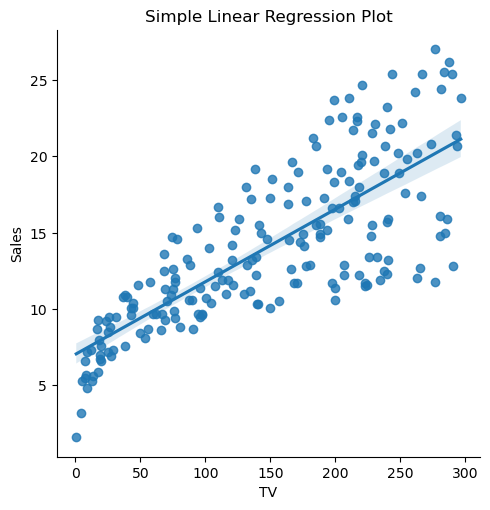

In [49]:
sns.lmplot(x='TV', y='Sales',data=adv)
plt.title('Simple Linear Regression Plot')
plt.show()

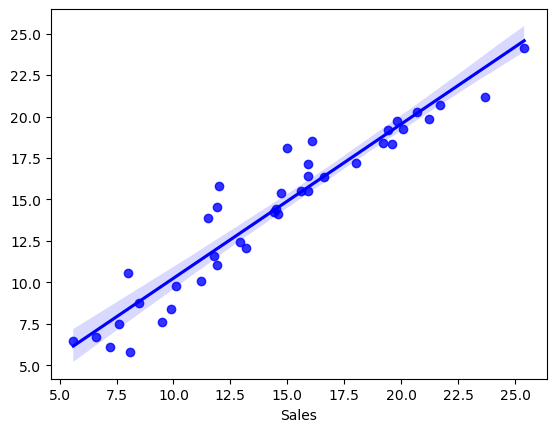

In [51]:
sns.regplot(x = ytest, y= ypred,color='blue')
plt.show()

R2-Score = 1-(Sum Squared Residual / Sum Squared total)